### Import Necessary Module and Set Path 

In [9]:
import sqlite3 as lite
import os
import sys
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [10]:

import write_deployinst_input as wr
import analysis as an

## Run Cyclus Input file

In [ ]:
! rm cyclus.sqlite
! cyclus eg01-eg23-cycamore.xml

### The output file should be named 
         
          cyclus.sqlite

In [6]:
# Wait for the complete message to move on

con = lite.connect('cyclus.sqlite')
with con:
    cur = con.cursor()
    
    # get simulation time info
    init_year, init_month, duration, timestep = an.get_sim_time_duration(cur)
    
    # prints net capacity and number of reactor timeseries
    an.plot_power(cur)
    
    # get line plot of different waste types
    waste_dict = an.total_waste_timeseries(cur)
    an.multi_line_plot(waste_dict, timestep,
                    'Years', 'Mass[MTHM]',
                    'Total Waste Mass vs Time',
                    'total_waste',
                    init_year)
    
    # get fuel usage timeseries in stacked bar chart
    fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])
    an.stacked_bar_chart(fuel_dict, timestep,
                      'Years', 'Mass[MTHM]',
                      'Total Fuel Mass vs Time',
                      'total_fuel',
                      init_year)

('utility', 24)
('utility2', 34)
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1

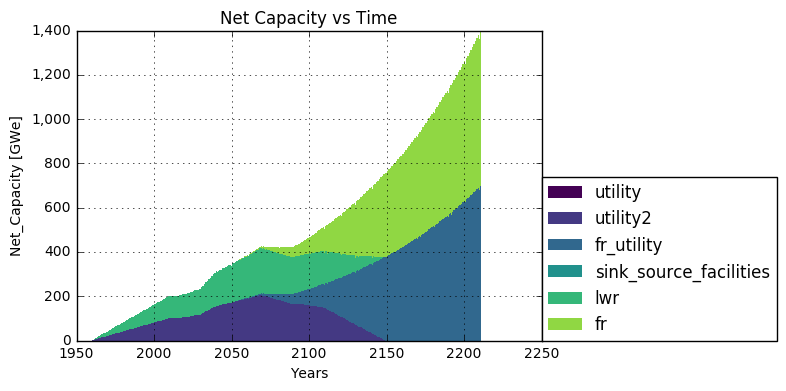

In [7]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

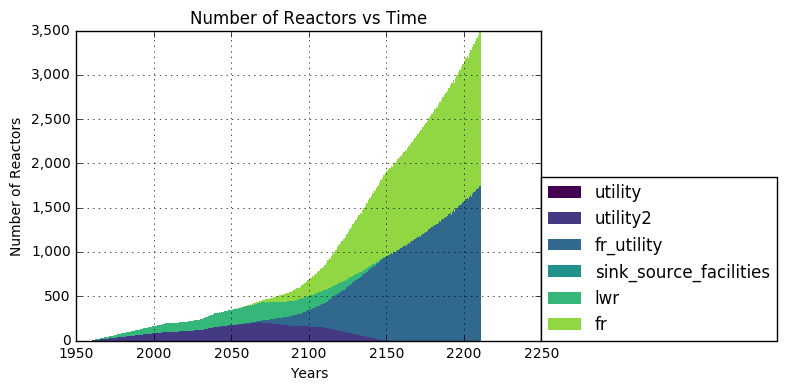

In [8]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='number_plot.png')